In [1]:
import acquire_adam
from bs4 import BeautifulSoup
import requests
from requests import get
import os
import pandas as pd
import json
from pprint import pprint
import nltk
import re
import unicodedata

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
'''hrefs = [] 
for p in range(1,11):
    url = f'https://github.com/search?p={p}&q=Hacktoberfest&type=Repositories'
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'html.parser')
    links = soup.find_all("a", {"class": "v-align-middle"})
    links = [l['href'] for l in links]
    hrefs.append(links)
    
flat_list = [item for sublist in hrefs for item in sublist]'''

'hrefs = [] \nfor p in range(1,11):\n    url = f\'https://github.com/search?p={p}&q=Hacktoberfest&type=Repositories\'\n    response = requests.get(url)\n    soup = BeautifulSoup(response.text,\'html.parser\')\n    links = soup.find_all("a", {"class": "v-align-middle"})\n    links = [l[\'href\'] for l in links]\n    hrefs.append(links)\n    \nflat_list = [item for sublist in hrefs for item in sublist]'

In [3]:
df = pd.read_json('data.json')
df

,repo,language,readme_contents
0,/AliceWonderland/hacktoberfest,HTML,# 🎃 HacktoberFest Starter Project 🎃\n\n** __Oc...
1,/fineanmol/Hacktoberfest2022,Python,Hacktoberfest-2022\n\n**Checkout this Project ...
2,/keshavsingh4522/hacktoberfest2021,Jupyter Notebook,"<div align=""centre"">\n <b>dont contribute i..."
3,/ossamamehmood/Hacktoberfest2022,Jupyter Notebook,# HacktoberFest 2022 `OPEN FIRST` Pull Request...
4,/tarunsinghofficial/HacktoberFest,Java,# HacktoberFest- Contribute to Open-Source.\n\...
...,...,...,...
125,/rituburman/hacktoberfest2020,C++,# Hacktoberfest For Everyone\nYou can start co...
126,/akanksha-raghav/Hacktoberfest2021,Jupyter Notebook,# Hacktoberfest2021\nHacktoberfest® is open to...
127,/TARANG0503/DSA-Practice,C++,## DSA Practice\nThis project is a collection ...
128,/rathoresrikant/HacktoberFestContribute,C++,Please note that the contributions made to thi...


In [4]:
def clean_text(text, extra_stopwords=['github', 'repository']):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    words = re.sub(r'_', '',' '.join(words)).split(' ') 
    words = [w for w in words if len(w)<25]
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
df['lemmatized'] = df.readme_contents.apply(clean_text)
df

,repo,language,readme_contents,lemmatized
0,/AliceWonderland/hacktoberfest,HTML,# 🎃 HacktoberFest Starter Project 🎃\n\n** __Oc...,"[hacktoberfest, starter, project, oct, 24th, 2..."
1,/fineanmol/Hacktoberfest2022,Python,Hacktoberfest-2022\n\n**Checkout this Project ...,"[hacktoberfest2022, checkout, project, well, a..."
2,/keshavsingh4522/hacktoberfest2021,Jupyter Notebook,"<div align=""centre"">\n <b>dont contribute i...","[div, aligncentre, bdont, contribute, repo, co..."
3,/ossamamehmood/Hacktoberfest2022,Jupyter Notebook,# HacktoberFest 2022 `OPEN FIRST` Pull Request...,"[hacktoberfest, 2022, open, first, pull, reque..."
4,/tarunsinghofficial/HacktoberFest,Java,# HacktoberFest- Contribute to Open-Source.\n\...,"[hacktoberfest, contribute, opensource, create..."
...,...,...,...,...
125,/rituburman/hacktoberfest2020,C++,# Hacktoberfest For Everyone\nYou can start co...,"[hacktoberfest, everyone, start, contributing,..."
126,/akanksha-raghav/Hacktoberfest2021,Jupyter Notebook,# Hacktoberfest2021\nHacktoberfest® is open to...,"[hacktoberfest2021, hacktoberfest, open, every..."
127,/TARANG0503/DSA-Practice,C++,## DSA Practice\nThis project is a collection ...,"[dsa, practice, project, collection, datastruc..."
128,/rathoresrikant/HacktoberFestContribute,C++,Please note that the contributions made to thi...,"[please, note, contribution, made, counted, va..."


In [6]:
def jupy_replace(df):
    new_lang = ['C++', 'C++','C++','python','python','python', 'python', 'python',
                 'python', 'python', 'python', 'python', 'python', 'C++',
                 'python', 'C++', 'python', 'python', 'python', 'HTML', 'python',
                 'Javascript']
    repo_mod = pd.DataFrame(df[df['language']== 'Jupyter Notebook']['repo'])
    repo_mod['new_lang'] = new_lang
    for x in repo_mod.index:
        df.loc[x, 'language'] = repo_mod.loc[x, 'new_lang']
    return df

In [7]:
df = jupy_replace(df)
df

,repo,language,readme_contents,lemmatized
0,/AliceWonderland/hacktoberfest,HTML,# 🎃 HacktoberFest Starter Project 🎃\n\n** __Oc...,"[hacktoberfest, starter, project, oct, 24th, 2..."
1,/fineanmol/Hacktoberfest2022,Python,Hacktoberfest-2022\n\n**Checkout this Project ...,"[hacktoberfest2022, checkout, project, well, a..."
2,/keshavsingh4522/hacktoberfest2021,C++,"<div align=""centre"">\n <b>dont contribute i...","[div, aligncentre, bdont, contribute, repo, co..."
3,/ossamamehmood/Hacktoberfest2022,C++,# HacktoberFest 2022 `OPEN FIRST` Pull Request...,"[hacktoberfest, 2022, open, first, pull, reque..."
4,/tarunsinghofficial/HacktoberFest,Java,# HacktoberFest- Contribute to Open-Source.\n\...,"[hacktoberfest, contribute, opensource, create..."
...,...,...,...,...
125,/rituburman/hacktoberfest2020,C++,# Hacktoberfest For Everyone\nYou can start co...,"[hacktoberfest, everyone, start, contributing,..."
126,/akanksha-raghav/Hacktoberfest2021,Javascript,# Hacktoberfest2021\nHacktoberfest® is open to...,"[hacktoberfest2021, hacktoberfest, open, every..."
127,/TARANG0503/DSA-Practice,C++,## DSA Practice\nThis project is a collection ...,"[dsa, practice, project, collection, datastruc..."
128,/rathoresrikant/HacktoberFestContribute,C++,Please note that the contributions made to thi...,"[please, note, contribution, made, counted, va..."


In [8]:
def clean_lang(df):
    df.language = df.language.str.lower()
    invalid = list(set(list(df.language.value_counts().index))-set(['c++', 'python', 'html']))
    invalid_index = df[df.language.isin(invalid)]['language'].index
    df.loc[invalid_index,'language']='other'
    df.loc[df[df.language.isna()].index,'language']='other'
    return df

In [9]:
df = clean_lang(df)

In [10]:
df.language.value_counts()

other     44
c++       34
python    29
html      23
Name: language, dtype: int64

In [11]:
df.head(20)

,repo,language,readme_contents,lemmatized
0,/AliceWonderland/hacktoberfest,html,# 🎃 HacktoberFest Starter Project 🎃\n\n** __Oc...,"[hacktoberfest, starter, project, oct, 24th, 2..."
1,/fineanmol/Hacktoberfest2022,python,Hacktoberfest-2022\n\n**Checkout this Project ...,"[hacktoberfest2022, checkout, project, well, a..."
2,/keshavsingh4522/hacktoberfest2021,c++,"<div align=""centre"">\n <b>dont contribute i...","[div, aligncentre, bdont, contribute, repo, co..."
3,/ossamamehmood/Hacktoberfest2022,c++,# HacktoberFest 2022 `OPEN FIRST` Pull Request...,"[hacktoberfest, 2022, open, first, pull, reque..."
4,/tarunsinghofficial/HacktoberFest,other,# HacktoberFest- Contribute to Open-Source.\n\...,"[hacktoberfest, contribute, opensource, create..."
5,/lingonsaft/hacktoberfest,html,# Readme-Emojis\n\n## Characters\n|syntax|prev...,"[readmeemojis, character, shit11thumbsupthumbs..."
6,/Showndarya/Hacktoberfest,python,[![Build Status](https://travis-ci.org/Shownda...,"[build, open, source, pull, top, average, time..."
7,/fineanmol/hacktoberfest,other,"# <img width=""56"" alt=""193515452-ebdf9e40-b074...","[img, width56, hacktoberfest, project, 2, anno..."
8,/shivaylamba/Hacktoberfest,c++,# Hacktoberfest Hello World !!!\n\nHacktoberFe...,"[hacktoberfest, hello, world, hacktoberfest, h..."
9,/abhpd/hacktoberfest2021,other,# ❗️ This Project is no longer accepting PRs ...,"[project, longer, accepting, pr, since, projec..."


In [12]:
from sklearn.model_selection import train_test_split
def split_data(df, target):
    
    '''
    Splits a df into a train, validate, and test set. 
    target is the feature you will predict
    '''
    full = df
    train_validate, test = train_test_split(df, train_size =.8, random_state = 21)
    train, validate = train_test_split(train_validate, train_size = .7, random_state = 21)
    X_train = train.drop(columns=target)
    y_train = train[target]
    X_val = validate.drop(columns=target)
    y_val = validate[target]
    X_test = test.drop(columns=target)
    y_test = test[target]
    
    
    return train, X_train, y_train, X_val, y_val, X_test, y_test

train, X_train, y_train, X_val, y_val, X_test, y_test = split_data(df, 'language')

In [13]:
train.head()

,repo,language,readme_contents,lemmatized
92,/codedamn/codedamn-hacktoberfest-projects,html,"# DISCLAIMER\n""This repository is no longer ac...","[disclaimer, longer, accepting, pr, p, alignce..."
39,/OpenSourceTogether/Hacktoberfest-2020,other,# Hey! Welcome to the Hacktoberfest 2020\n\n##...,"[hey, welcome, hacktoberfest, 2020, disclaimer..."
24,/sbmxc/hacktoberfest,python,# HacktoberFest is here!!\n\nUse this reposit...,"[hacktoberfest, use, make, first, easy, contri..."
124,/dikshantrajput/Hacktoberfest-accepted-2022,c++,"<h1 align=""center""> <img src= ""https://octodex...","[h1, aligncenter, img, src, width, 40, hacktob..."
80,/adarshpand3y/Hacktoberfest2022-DSA,other,\n# 🎃 Hacktoberfest2022-DSA 💻\n\nParticipate i...,"[hacktoberfest2022dsa, participate, hacktoberf..."


In [14]:
train.shape

(72, 4)

In [15]:
all_blog_words = clean_text(' '.join(train['readme_contents']))
python_words = clean_text(' '.join(train[train['language'] == 'python']['readme_contents']))
cplus_words = clean_text(' '.join(train[train['language'] == 'c++']['readme_contents']))
html_words = clean_text(' '.join(train[train['language'] == 'html']['readme_contents']))
other_words = clean_text(' '.join(train[train['language'] == 'other']['readme_contents']))

In [16]:
python_words

['hacktoberfest',
 'use',
 'make',
 'first',
 'easy',
 'contribution',
 'open',
 'source',
 'world',
 'create',
 'easy',
 'pull',
 'request',
 'following',
 'step',
 'given',
 'celebrate',
 'getting',
 'involved',
 'open',
 'source',
 'community',
 'completing',
 'simple',
 'task',
 'project',
 'open',
 'member',
 'community',
 'member',
 'may',
 'contribute',
 'project',
 'without',
 'collaborator',
 'also',
 'checkout',
 'repository',
 'mine',
 'find',
 'improve',
 'something',
 'welcome',
 'make',
 'pr',
 'well',
 'although',
 'would',
 'approved',
 'enhance',
 'existing',
 'apps',
 'hacktoberfest',
 'many',
 'time',
 'organised',
 'year',
 'monthlong',
 'celebration',
 'october',
 '1st',
 '31st',
 'sponsored',
 'digital',
 'get',
 'people',
 'involved',
 'open',
 'create',
 'first',
 'pull',
 'request',
 'public',
 'contribute',
 'open',
 'source',
 'developer',
 'community',
 'contribute',
 'project',
 'simple',
 'way',
 'contribut',
 'project',
 'create',
 'simple',
 'hello',
 'w

In [17]:
hack_bigrams = pd.Series(nltk.ngrams(all_blog_words, 2))
hack_bigrams.head()

0    (disclaimer, longer)
1     (longer, accepting)
2         (accepting, pr)
3                 (pr, p)
4        (p, aligncenter)
dtype: object

In [18]:
top_hack_bigrams = hack_bigrams.value_counts().head(10)
top_hack_bigrams

(pull, request)               288
(open, source)                188
(, )                          137
(computer, td)                 87
(aligncentera, width100px)     87
(titlecode, computer)          87
(td, td)                       76
(computer, science)            75
(td, aligncentera)             72
(width100px, altbr)            62
dtype: int64

In [19]:
hack_trigrams = pd.Series(nltk.ngrams(all_blog_words, 3))
hack_trigrams.head()

0    (disclaimer, longer, accepting)
1            (longer, accepting, pr)
2                 (accepting, pr, p)
3               (pr, p, aligncenter)
4              (p, aligncenter, img)
dtype: object

In [20]:
top_hack_trigrams = hack_trigrams.value_counts().head(10)
top_hack_trigrams

(, , )                               131
(titlecode, computer, td)             87
(computer, td, td)                    72
(td, td, aligncentera)                72
(td, aligncentera, width100px)        72
(aligncentera, width100px, altbr)     60
(computer, science, student)          35
(first, pull, request)                35
(make, pull, request)                 32
(open, source, project)               29
dtype: int64

In [21]:
readme_counts = pd.Series(all_blog_words).value_counts()
python_counts = pd.Series(python_words).value_counts()
cplus_counts = pd.Series(cplus_words).value_counts()
html_counts = pd.Series(html_words).value_counts()
other_counts = pd.Series(other_words).value_counts()

In [22]:
python_counts

pull             76
request          73
hacktoberfest    52
open             48
project          46
                 ..
metadata          1
playing           1
context           1
issuing           1
singh             1
Length: 1437, dtype: int64

In [23]:
word_freq = pd.concat([readme_counts, python_counts, cplus_counts, html_counts, other_counts], axis=1)
word_freq.head()

,0,1,2,3,4
hacktoberfest,336,52.0,133.0,56.0,95.0
pull,304,76.0,90.0,57.0,81.0
request,303,73.0,89.0,53.0,88.0
developer,286,11.0,248.0,15.0,12.0
student,286,3.0,279.0,3.0,1.0


In [24]:
word_freq.columns = ['readme', 'python', 'cplus+', 'html', 'other']

In [25]:
word_freq.describe()

,readme,python,cplus+,html,other
count,5144.000000,1437.000000,3439.000000,1344.000000,1595.000000
mean,5.297045,2.869868,3.709218,3.110863,3.878997
std,17.964329,5.428227,12.111192,5.707077,8.009391
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000
75%,3.000000,2.000000,2.000000,2.000000,3.000000
max,336.000000,76.000000,279.000000,66.000000,95.000000


In [26]:
word_freq.value_counts()

readme  python  cplus+  html  other
5       1.0     1.0     1.0   2.0      23
4       1.0     1.0     1.0   1.0      13
6       1.0     2.0     1.0   2.0       6
8       1.0     3.0     3.0   1.0       4
7       1.0     2.0     1.0   3.0       4
                                       ..
16      2.0     8.0     1.0   5.0       1
                7.0     4.0   3.0       1
                6.0     3.0   5.0       1
                5.0     3.0   6.0       1
336     52.0    133.0   56.0  95.0      1
Length: 394, dtype: int64

In [27]:
word_freq = word_freq.loc[word_freq['readme'] <= 200]
word_freq

,readme,python,cplus+,html,other
source,197,37.0,78.0,32.0,50.0
code,180,32.0,79.0,32.0,37.0
td,173,NaN,161.0,NaN,12.0
file,162,22.0,53.0,34.0,53.0
create,159,35.0,45.0,32.0,47.0
...,...,...,...,...,...
presently,1,NaN,1.0,NaN,NaN
deepak,1,NaN,1.0,NaN,NaN
d02d33pak,1,NaN,1.0,NaN,NaN
xyz,1,NaN,1.0,NaN,NaN


In [28]:
word_freq = word_freq.loc[word_freq['readme'] >= 25]
word_freq

,readme,python,cplus+,html,other
source,197,37.0,78.0,32.0,50.0
code,180,32.0,79.0,32.0,37.0
td,173,NaN,161.0,NaN,12.0
file,162,22.0,53.0,34.0,53.0
create,159,35.0,45.0,32.0,47.0
...,...,...,...,...,...
tech,25,NaN,20.0,3.0,2.0
point,25,4.0,7.0,5.0,9.0
see,25,2.0,4.0,8.0,11.0
good,25,3.0,13.0,2.0,7.0


In [29]:
word_freq.isna().sum()

readme     0
python    18
cplus+     0
html      21
other     11
dtype: int64

In [30]:
word_freq.shape

(187, 5)

In [31]:
word_freq.fillna(0, inplace=True)

/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_17084/2363963448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_freq.fillna(0, inplace=True)


In [32]:
word_freq.isna().sum()

readme    0
python    0
cplus+    0
html      0
other     0
dtype: int64

In [33]:
word_freq = word_freq.astype('int')
word_freq.head()

,readme,python,cplus+,html,other
source,197,37,78,32,50
code,180,32,79,32,37
td,173,0,161,0,12
file,162,22,53,34,53
create,159,35,45,32,47


# Are there any words that uniquely identify a programming language?

H_0: The top common words in readmes are not correlated with any of the programming languages.    

H_a: The top common words in readmes are correlated with one or more of the programming languages.    

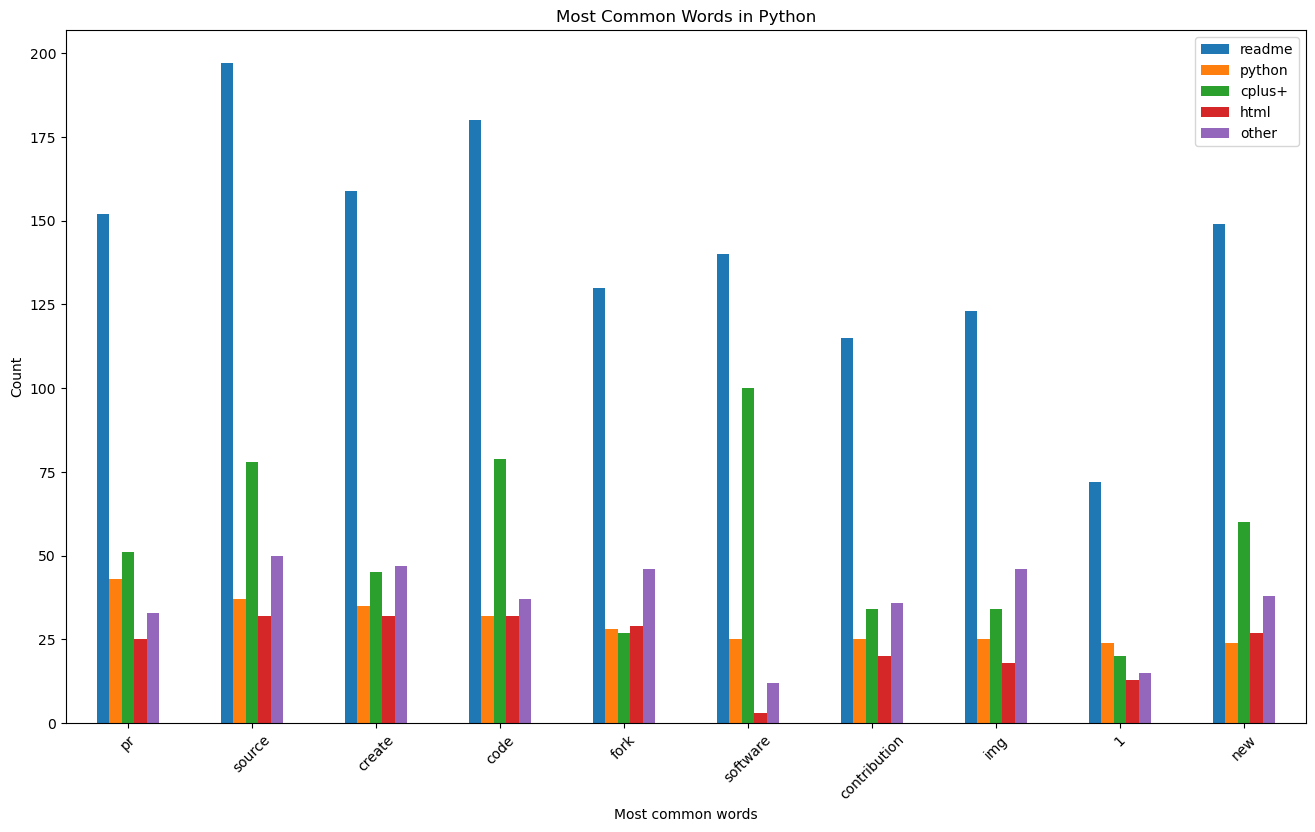

In [34]:
#Plot the most frequent words and color by label
word_freq.sort_values('python', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most Common Words in Python')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

- The three most common words in Python are: pr, source, and create.  
- Software could also be added to this list, because it occurs rarely in HTML and other languages. 
- While these are the three most common words, the words are, for the most part, distributed evenly throughout most of the programming languages.  

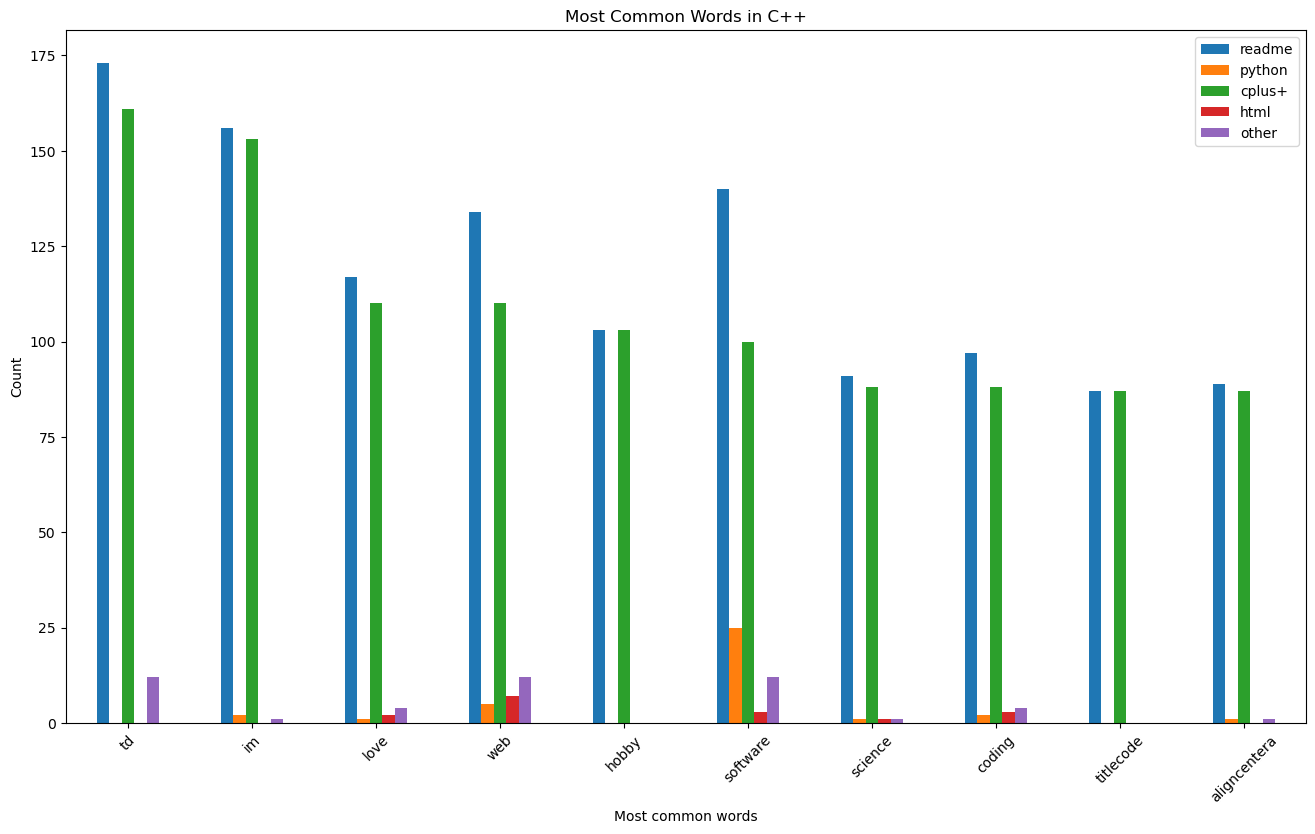

In [35]:
#Plot the most frequent words and color by label
word_freq.sort_values('cplus+', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most Common Words in C++')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

- The three most common words in C++ are: td, im, and love.
- While these are the three most common words, hobby and titlecode should be added to this list because they do not appear in HTML, Python, or any of the other languages.

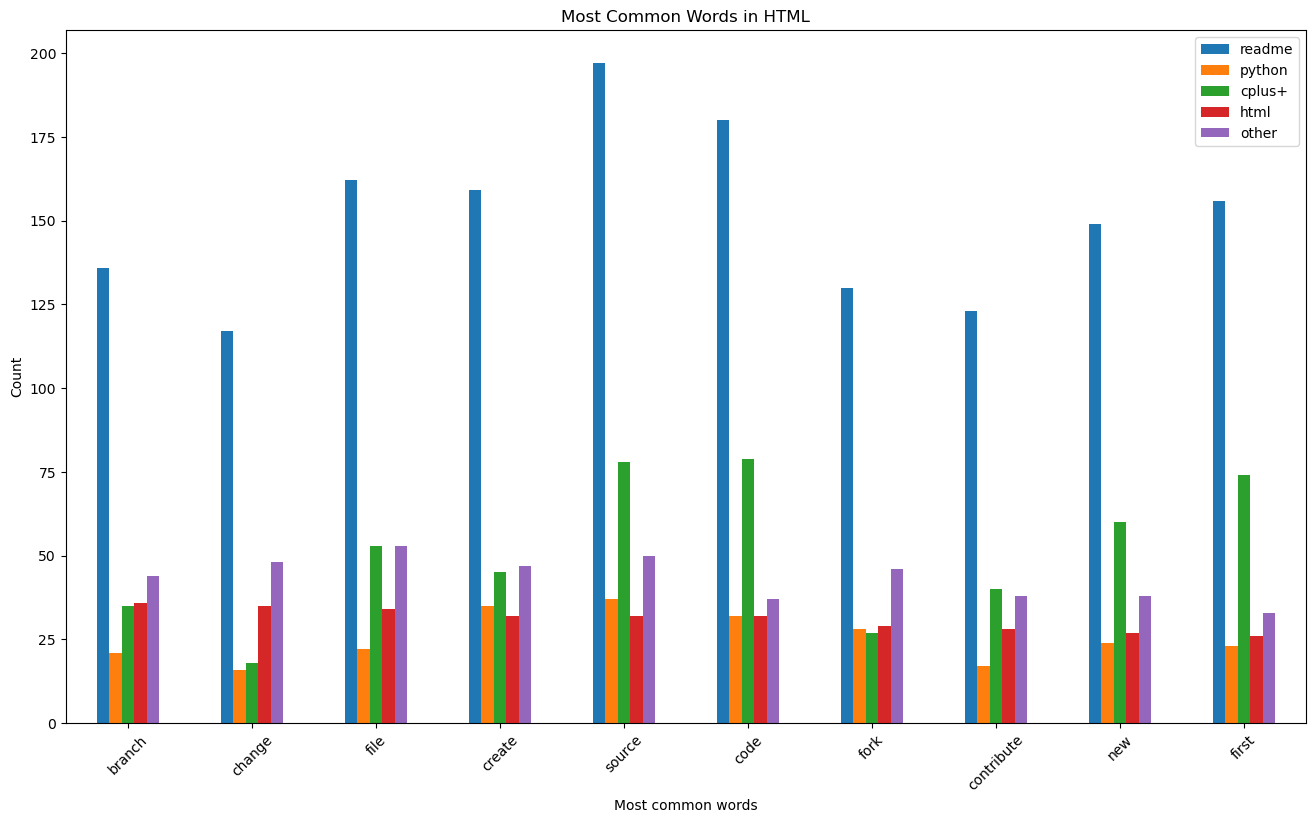

In [36]:
#Plot the most frequent words and color by label
word_freq.sort_values('html', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most Common Words in HTML')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

- The three most common words in HTML are: branch, change, and file.
- HTML appears the most evenly distributed of all the programming languages and is harder to determine a specific word or words for this language.

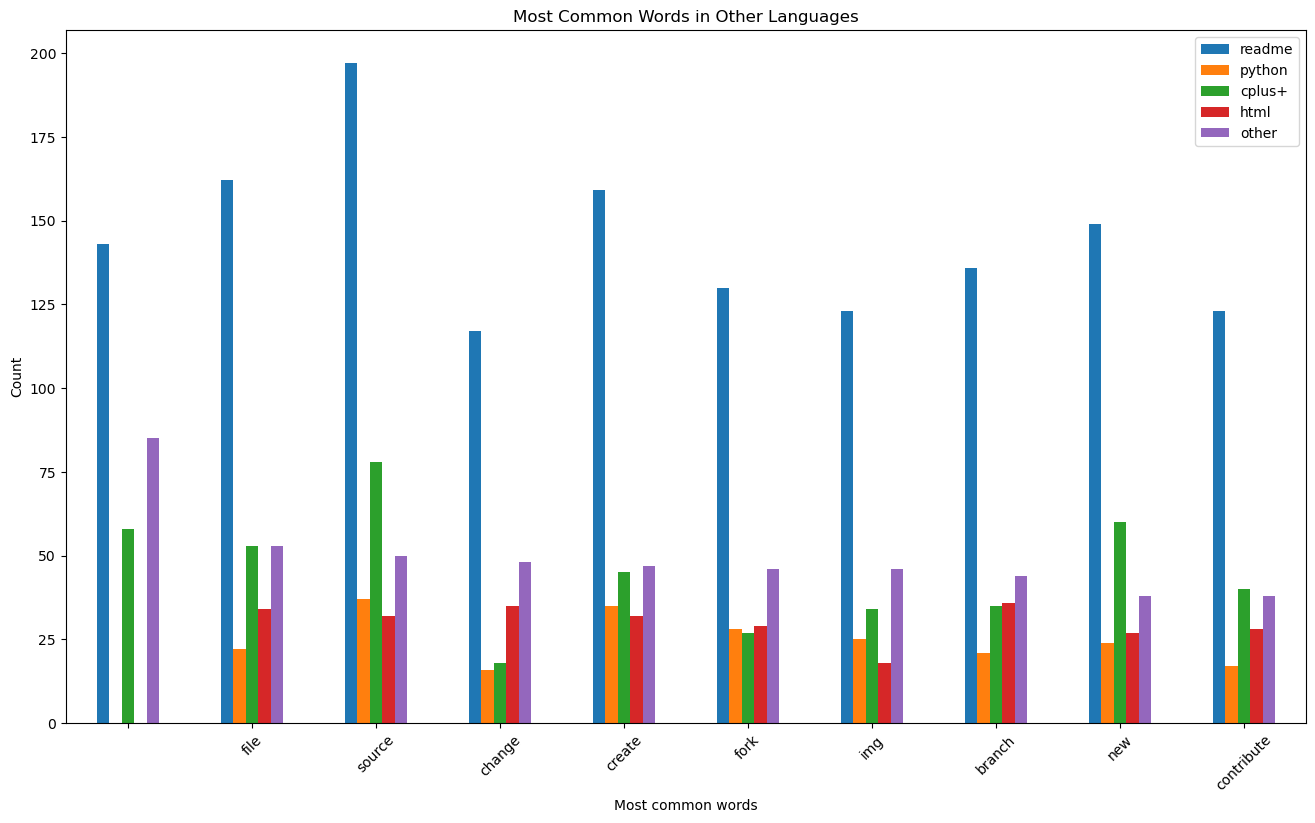

In [37]:
#Plot the most frequent words and color by label
word_freq.sort_values('other', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most Common Words in Other Languages')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

- The three most common words in other languages are: file, source, and change.
- All of the words in the top ten for other languages are about the same.

***Takeaways***

The null hypothesis is rejected because, at a minimum, td and im appear in C++ and the READMEs are about the same, but almost not at all in python and HTML. Further investigation into the other programing languages and the top words may offer more insights.

# What are the most common words in READMEs?

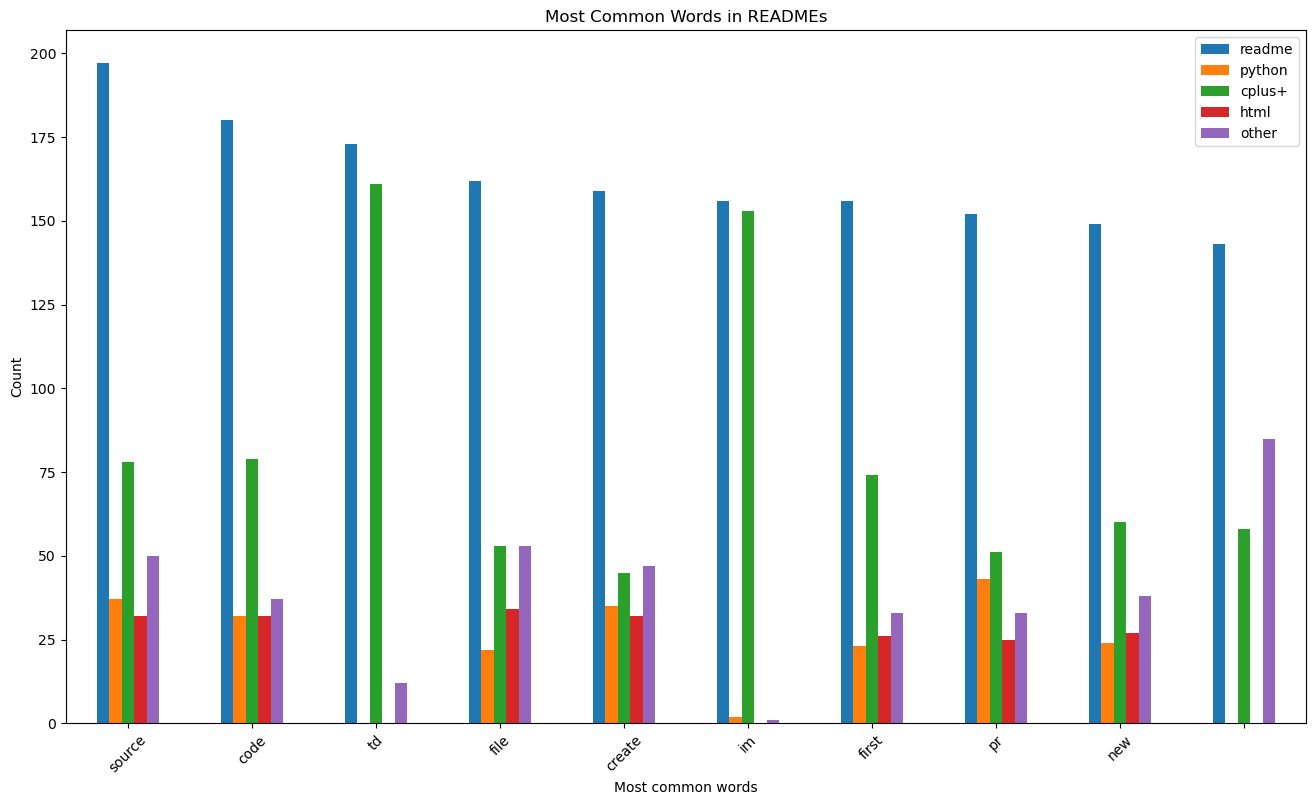

In [38]:
#Plot the most frequent words and color by label
word_freq.sort_values('readme', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most Common Words in READMEs')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

- The three most common words in readmes are: source, code, td, file, and create.
- Soure and code are overwhelmingls the top two words when compared to the top four languages.
- td for readme and C++ are very close, but python and html are not present.

H_0: The top common words in readmes are not correlated with any of the programming languages.

H_a: The top common words in readmes are correlated with one or more of the programming languages.

***Takeaways***

The null hypothesis is rejected because, at a minimum, td and im appear in C++ and the READMEs about the same, but almost not at all in python and HTML. Furthermore, the two of the top three words in python (pr and create) do not appear as top words in any of the other programming languages, along with software. None of the top words in C++ appeared as top words in any of the other programming languages and had the highest difference between these top words versus the three other programming languages. Only one of the top words words in HTML (branch) did not appear in the other progamming language. None of the top three programming languages appeared in the top ten of eachother. Only other had the same top words (source, file, and change) with python and mainly HTML. The top three words overall in READMEs were source, code, and td. Code did not appear in any of the top three, but source and td appeared in python, C++, and other, the top three coding languages. Based on these takeaways it appears that the words below are most related to the respective programming language:

Python = pr, create, and software

C++ = td, im, hobby, and titlecode (love could be added to this list, but might not appear in other repos not associated with hacktoberfest)

HTML = branch